In [50]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
#import scipy.stats as stats
import csv

Dos_file1 = 'counts_Data/dos_led_back.txt'
Dos_file2 = 'counts_Data/dos_osl.txt'

salt_file1 = 'counts_Data/salt_led_back.txt'
salt_file2 = 'counts_Data/salt_osl.txt'

smr_file1 = 'counts_Data/smr_led_back.txt'
smr_file2 = 'counts_Data/smr_osl.txt'



def parse_txt(data_file):
    times = []
    counts = []
    with open(data_file, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            times.append(float(row[0]))
            counts.append(float(row[1]))
    return [times, counts]

Dos_data1 = parse_txt(Dos_file1)
Dos_times1 = list((np.array(Dos_data1[0]) * 1e-3) - Dos_data1[0][0] * 1e-3)
Dos_counts_back = list(np.array(Dos_data1[1]) - Dos_data1[1][0])
Dos_non_cum_back= np.zeros(len(Dos_counts_back))
for i in range(1, len(Dos_counts_back)-1):
    Dos_non_cum_back[i] = Dos_data1[1][i] - Dos_data1[1][i-1]

Dos_data2 = parse_txt(Dos_file2)
Dos_times2 = list((np.array(Dos_data2[0]) * 1e-3) - Dos_data2[0][0] * 1e-3)
Dos_counts_osl = list(np.array(Dos_data2[1]) - Dos_data2[1][0]) #np.array(Dos_data2[1]) - Dos_data2[1][0]
Dos_non_cum_osl= np.zeros(len(Dos_counts_osl))
for i in range(1, len(Dos_counts_osl)-1):
    Dos_non_cum_osl[i] = Dos_data2[1][i] - Dos_data2[1][i-1]
Dos_osl_noback = np.zeros(len(Dos_counts_osl))
for i in range(len(Dos_counts_osl)):
     Dos_osl_noback[i] += Dos_counts_osl[i] - Dos_counts_back[i]

data3 = parse_txt(salt_file1)
times3 = list((np.array(data3[0]) * 1e-3) - data3[0][0] * 1e-3)
counts3 = list(np.array(data3[1]) - data3[1][0])

data4 = parse_txt(salt_file2)
times4 = list((np.array(data4[0]) * 1e-3) - data4[0][0] * 1e-3)
counts4 = list(np.array(data4[1]) - data4[1][0])

smrdataback = parse_txt(smr_file1)
smrbacktimes = list((np.array(smrdataback[0]) * 1e-3) - smrdataback[0][0] * 1e-3)
smrback = list(np.array(smrdataback[1]) - smrdataback[1][0])
smr_non_cum_back= np.zeros(len(smrback))
for i in range(1, len(smrback)-1):
    smr_non_cum_back[i] = smrdataback[1][i] - smrdataback[1][i-1]


smrosldata = parse_txt(smr_file2)
smrtimes = list((np.array(smrosldata[0]) * 1e-3) - smrosldata[0][0] * 1e-3)
smrosl = list(np.array(smrosldata[1]) - smrosldata[1][0])
smr_non_cum_osl= np.zeros(len(smrosl))
for i in range(1, len(smrosl)-1):
    smr_non_cum_osl[i] = smrosldata[1][i] - smrosldata[1][i-1]

smr_osl_noback = np.zeros(len(smrback))
for i in range(len(smrback)):
     smr_osl_noback[i] += smrosl[i] - smrback[i]

def chi2 (modelvalues, data, errors):
    chisq = 0
    for i in range(len(data)):
        chisq += ((data[i]-modelvalues[i])**2)/errors**2
    Dof = len(data) - 1 # 1 parameter, the gradient of the line
    reducedchi2 = chisq/Dof
    print( 'Reduced chi squared = ' + str(reducedchi2))
    return reducedchi2

def Countingerr(noncumOSL):
    mean = statistics.mean(noncumOSL)
    return np.sqrt(mean)

def bestfit(times, OSL, error):
    params = np.polyfit(times, OSL, 1)
    line = params [1] + params[0]*np.array(times)
    graderr = params[0]*np.sqrt((error/OSL[-1])**2 +(times[1]/times[-1])**2)
    print('gradient = ' +str(params[0]) + ' +/- ' + str(graderr))
    plt.plot(times, line)
    return line



gradient = 0.8604698820565363 +/- 0.0036790242745063356
Reduced chi squared = 469.18516965501567


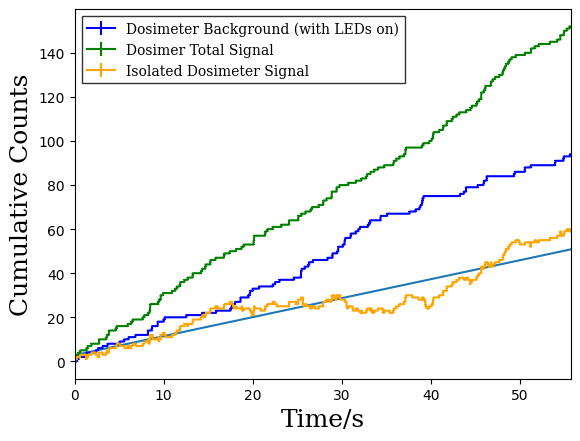

In [49]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }
Dos_err = np.sqrt(Countingerr(Dos_non_cum_back*np.sqrt(2))**2 + Countingerr(Dos_non_cum_osl*np.sqrt(2))**2)
plt.errorbar(Dos_times1, Dos_counts_back, yerr = Countingerr(Dos_non_cum_back*np.sqrt(2)), label='Dosimeter Background (with LEDs on)', color = 'blue')
plt.errorbar(Dos_times2, Dos_counts_osl, yerr = Countingerr(Dos_non_cum_osl*np.sqrt(2)),label='Dosimer Total Signal', color = 'green')
plt.errorbar(Dos_times2, Dos_osl_noback, yerr = Dos_err, label='Isolated Dosimeter Signal', color = 'orange')
plt.legend(prop={'family': 'serif'}, edgecolor = "black", fancybox=False)
plt.xlabel('Time/s', fontdict=font)
plt.ylabel('Cumulative Counts', fontdict=font)
#plt.title('Dosimeter OSL')
bestfitDos = bestfit(Dos_times2, Dos_osl_noback, Dos_err)
chi2(bestfitDos, Dos_osl_noback, Dos_err)#np.sqrt(Countingerr(Dos_counts_back)**2 + Countingerr(Dos_counts_osl)**2)) #statistics.stdev(Dos_osl_noback))
plt.xlim(0, Dos_times2[-1])
# plt.savefig(fname = my_file_name)
plt.show()

In [4]:
#This graph was not indicative of the Salt, it got overwritten with something else
#plt.plot(times3, counts3, label='Background (with LED)')
#plt.plot(times4, counts4, label='OSL')
#plt.legend(prop={'family': 'serif'}, edgecolor = "black", fancybox=False)
#plt.xlabel('Time (s)', fontdict=font)
#plt.ylabel('Cumulative Counts', fontdict=font)
#plt.title('Salt OSL - This graph was not indicative of the Salt, it got overwritten with something else')
#plt.show()

gradient = 0.08027996750434241 +/- 0.002748168869344043
Reduced chi squared = 115.66173863037581


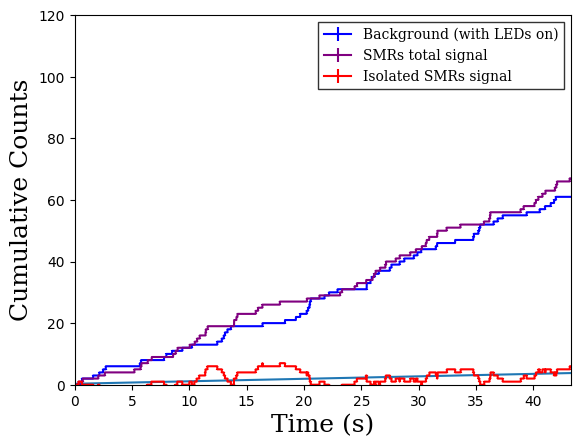

In [48]:
smr_err = np.sqrt(Countingerr(smr_non_cum_osl*np.sqrt(2))**2 + Countingerr(smr_non_cum_back*np.sqrt(2))**2)
plt.errorbar(smrbacktimes, smrback, yerr = Countingerr(smr_non_cum_back*np.sqrt(2)), label='Background (with LEDs on)', color = 'blue')
plt.errorbar(smrtimes, smrosl,yerr = Countingerr(smr_non_cum_osl*np.sqrt(2)), label='SMRs total signal', color = 'purple')
plt.errorbar(smrbacktimes, smr_osl_noback, yerr = smr_err, label ='Isolated SMRs signal', color = 'red')
bestfitsmr = bestfit(smrbacktimes, smr_osl_noback, smr_err)
chi2(bestfitsmr, smr_osl_noback, smr_err)#statistics.stdev(smr_osl_noback))
plt.xlim(0, smrbacktimes[-1])
plt.ylim(0, 120)
plt.legend(prop={'family': 'serif'}, edgecolor = "black", fancybox=False)
plt.xlabel('Time (s)', fontdict=font)
plt.ylabel('Cumulative Counts', fontdict=font)
#plt.title('SMR OSL')
plt.show()



In [6]:
print(Dos_times2)

[np.float64(0.0), np.float64(0.009999999999990905), np.float64(0.01999999999998181), np.float64(0.03100000000000591), np.float64(0.04099999999999682), np.float64(0.05099999999998772), np.float64(0.06099999999997863), np.float64(0.07099999999996953), np.float64(0.08100000000001728), np.float64(0.09100000000000819), np.float64(0.10099999999999909), np.float64(0.11099999999999), np.float64(0.1209999999999809), np.float64(0.1309999999999718), np.float64(0.14100000000001955), np.float64(0.15100000000001046), np.float64(0.16199999999997772), np.float64(0.17199999999996862), np.float64(0.18200000000001637), np.float64(0.19200000000000728), np.float64(0.20199999999999818), np.float64(0.21199999999998909), np.float64(0.22199999999998), np.float64(0.2319999999999709), np.float64(0.24200000000001864), np.float64(0.25200000000000955), np.float64(0.26200000000000045), np.float64(0.27199999999999136), np.float64(0.28300000000001546), np.float64(0.29300000000000637), np.float64(0.3039999999999736), n

In [7]:
def Counts_to_intesity(countsdata, timedata):
    timewidth = timedata[1]-timedata[0]
    intensity = np.zeros(len(countsdata))
    for i in range (1, len(countsdata)):
        intensity[i] = (countsdata[i]-countsdata[i-1])/timewidth
    return intensity

In [8]:
Dos_Intensity = Counts_to_intesity(Dos_osl_noback, Dos_times2)

gradient = 0.08027996750434241 +/- 0.01915630587977408
gradient = 0.8604698820565363 +/- 0.07553469340425391


Text(0.5, 1.0, 'Dosimeter and SMR OSL')

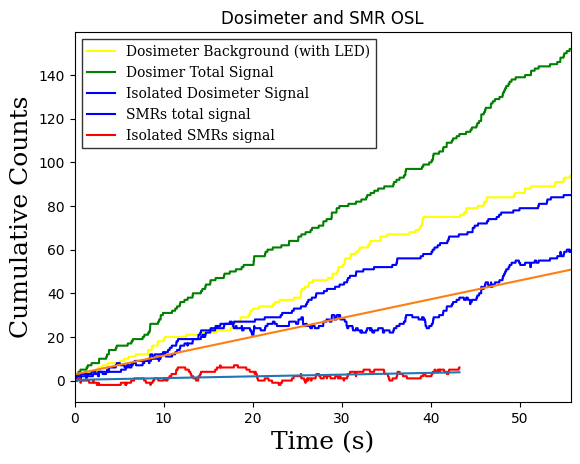

In [9]:
plt.plot(Dos_times1, Dos_counts_back, label='Dosimeter Background (with LED)', color = 'yellow')
plt.plot(Dos_times2, Dos_counts_osl, label='Dosimer Total Signal', color = 'green')
plt.plot(Dos_times2, Dos_osl_noback, label='Isolated Dosimeter Signal', color = 'blue')
#plt.plot(smrbacktimes, smrback, label='SMR Background (with LED)', color = 'blue')
plt.plot(smrtimes, smrosl, label='SMRs total signal', color = 'blue')
plt.plot(smrbacktimes, smr_osl_noback, label ='Isolated SMRs signal', color = 'red')
bestfitsmr = bestfit(smrbacktimes, smr_osl_noback)
bestfitDos = bestfit(Dos_times2, Dos_osl_noback)
plt.xlim(0, Dos_times2[-1])
plt.legend(prop={'family': 'serif'}, edgecolor = "black", fancybox=False)
plt.xlabel('Time (s)', fontdict=font)
plt.ylabel('Cumulative Counts', fontdict=font)
plt.title('Dosimeter and SMR OSL')

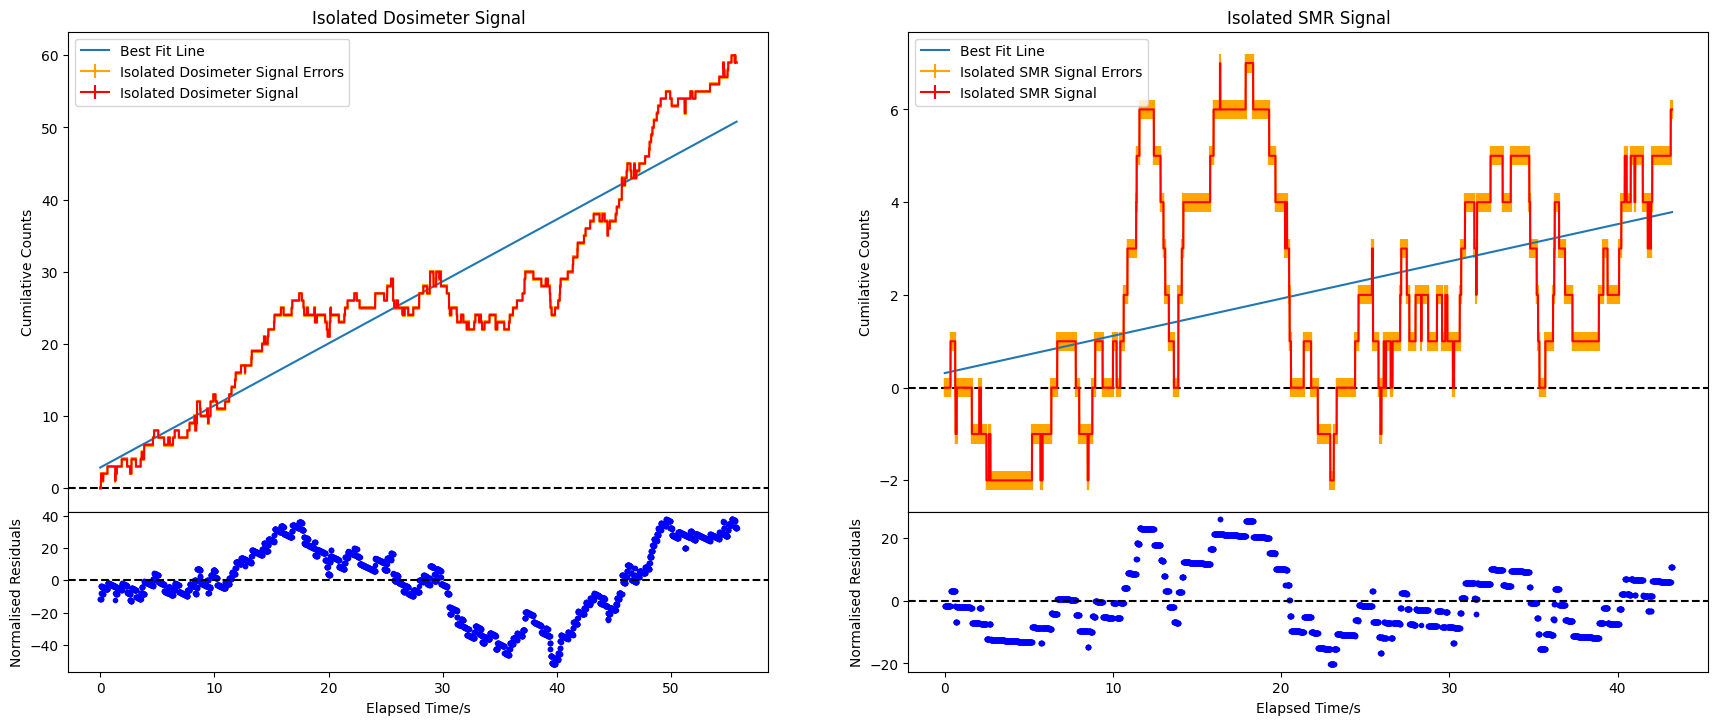

In [54]:
fig, ax = plt.subplots(2,2, figsize= (20,8), height_ratios= [2,0.5])
#Dosimeter

ax[0,0].errorbar(Dos_times2, Dos_osl_noback, yerr = Dos_err, label='Isolated Dosimeter Signal Errors', color = 'orange')
ax[0,0].errorbar(Dos_times2, Dos_osl_noback, yerr = 0, label='Isolated Dosimeter Signal', color = 'red')
ax[0,0].plot(Dos_times2, bestfitDos, label = 'Best Fit Line')
ax[0,0].axhline(y=0, color = 'black', ls = '--')
residuals = np.zeros(len(Dos_times2))
for i in range(len(residuals)):
    residuals[i] = (Dos_osl_noback[i]-bestfitDos[i])/Dos_err
ax[1,0].scatter(Dos_times2, residuals, marker = '.', color = 'blue')
ax[1,0].axhline(y=0, color = 'black', ls = '--')
#ax[1,0].axhline(y=np.mean(residuals), color = 'green', ls = '--')
ax[0,0].set_title( "Isolated Dosimeter Signal")
ax[0,0].set_ylabel('Cumilative Counts')
ax[0,0].legend(loc = 'upper left')
ax[1,0].set_xlabel('Elapsed Time/s')
ax[1,0].set_ylabel('Normalised Residuals')
ax[1,0].set_position([0.18, 0.20, 0.35, 0.2])
ax[0,0].set_position([0.18, 0.40, 0.35, 0.6])

#SMRs

ax[0,1].errorbar(smrbacktimes, smr_osl_noback, yerr = smr_err, label='Isolated SMR Signal Errors', color = 'orange')
ax[0,1].errorbar(smrbacktimes, smr_osl_noback, yerr = 0, label='Isolated SMR Signal', color = 'red')
ax[0,1].axhline(y=0, color = 'black', ls = '--')
ax[0,1].plot(smrbacktimes, bestfitsmr, label = 'Best Fit Line')
residuals = np.zeros(len(smr_osl_noback))
for i in range(len(residuals)):
    residuals[i] = (smr_osl_noback[i]-bestfitsmr[i])/smr_err
ax[1,1].scatter(smrbacktimes, residuals, marker = '.', color = 'blue')
ax[1,1].axhline(y=0, color = 'black', ls = '--')
#ax[1,1].axhline(y=np.mean(residuals), color = 'green', ls = '--')
ax[0,1].set_title( "Isolated SMR Signal")
ax[0,1].set_ylabel('Cumilative Counts')
ax[0,1].legend(loc = 'upper left')
ax[1,1].set_xlabel('Elapsed Time/s')
ax[1,1].set_ylabel('Normalised Residuals')
ax[1,1].set_position([0.60, 0.20, 0.40, 0.2])
ax[0,1].set_position([0.60, 0.40, 0.40, 0.6])

AttributeError: 'numpy.ndarray' object has no attribute 'errorbar'

In [ ]:
print(Dos_err)
print(smr_err)

8.913046978057345


gradient = 2.6204170480411775 +/- 0.14881282511092775
gradient = 1.5404607426146988 +/- 0.10804420517193562


array([ -1.73784527,  -1.7209002 ,  -1.70395513, ..., 102.0691828 ,
       102.0845874 , 102.09999201])

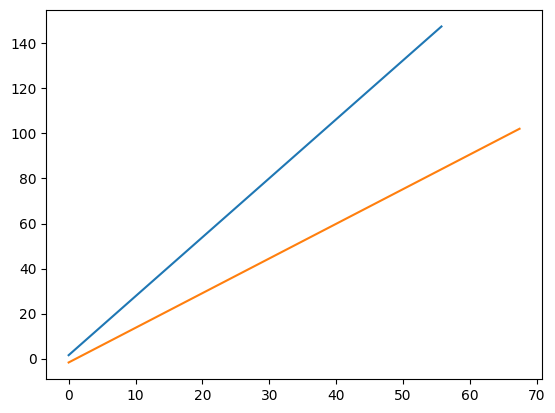

In [29]:
bestfit(Dos_times2, np.array(Dos_counts_osl), Countingerr(Dos_counts_osl))
bestfit(smrtimes, np.array(smrosl), Countingerr(smrosl))

In [21]:
(1.7505656920186312 + 1.4555203535997936)/2

1.6030430228092123

In [22]:
np.sqrt(0.12499142568241446**2+0.12907301531508558**2)

np.float64(0.1796738706007383)